In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\CBAP\R\Data Set\bike_buyers.csv")
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


# EDA

### Univariate Stats 

In [3]:
print(f"Shape of data : {df.shape}")

Shape of data : (1000, 13)


In [5]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
df["Marital Status"].head()

0    Married
1    Married
2    Married
3     Single
4     Single
Name: Marital Status, dtype: object

In [99]:
df['Marital Status'].value_counts(dropna = False)

Married    539
Single     461
Name: Marital Status, dtype: int64

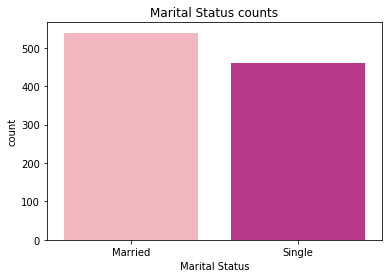

In [7]:
sns.countplot(x = "Marital Status",data = df,palette = 'RdPu')
plt.title("Marital Status counts")
plt.show()

In [102]:
df['Gender'].value_counts(dropna = False)

Male      509
Female    491
Name: Gender, dtype: int64

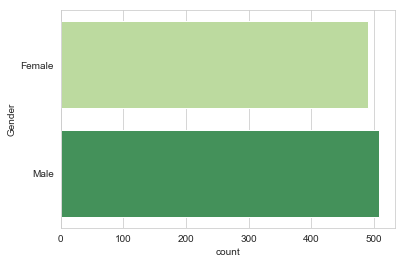

In [103]:
sns.countplot(y = 'Gender',data = df,palette = "YlGn")
plt.show()

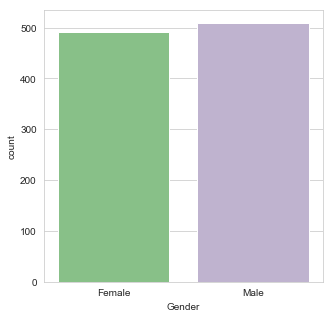

In [105]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Gender',data = df,palette = "Accent")
plt.show()

In [106]:
df["Occupation"].value_counts()

Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: Occupation, dtype: int64

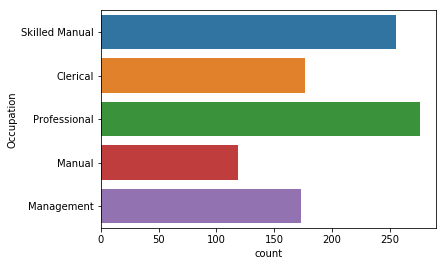

In [8]:
sns.countplot(y = "Occupation",data = df)
plt.show()

In [10]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [11]:
df["Children"] = df["Children"].astype('object')
df["Children"].dtypes

dtype('O')

In [12]:
df.describe()

,ID,Income,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.452000,44.190000
std,5347.333948,31081.609779,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,25.000000
25%,15290.750000,30000.000000,1.000000,35.000000
50%,19744.000000,60000.000000,1.000000,43.000000
75%,24470.750000,70000.000000,2.000000,52.000000
max,29447.000000,170000.000000,4.000000,89.000000


In [13]:
df["Children"].value_counts(dropna = False)

0    277
2    210
1    170
3    135
4    127
5     81
Name: Children, dtype: int64

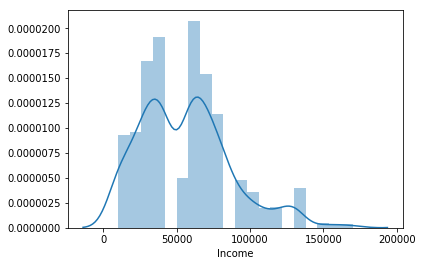

In [17]:
sns.distplot(df["Income"])
plt.show()

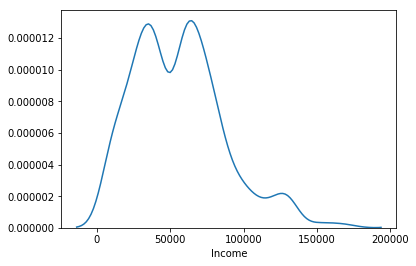

In [18]:
sns.distplot(df["Income"],hist = False,kde = True)
plt.show()

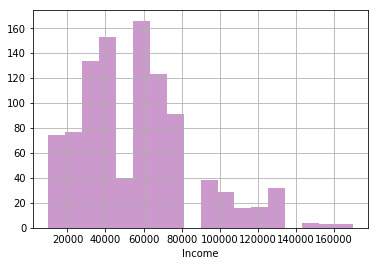

In [16]:
plt.grid()
sns.distplot(df["Income"],hist = True,kde = False,color = 'Purple',bins = 18)
plt.show()

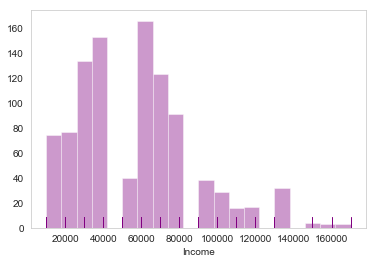

In [87]:
sns.distplot(df["Income"],rug = True,hist = True,kde = False,color = 'Purple')
plt.show()

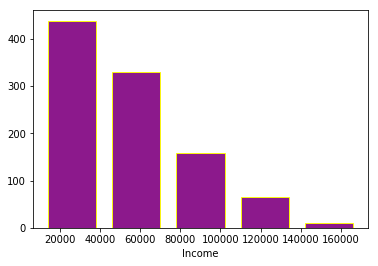

In [20]:
sns.distplot(df["Income"],hist = True,kde = False,color = 'Purple',bins = 5,
             hist_kws={"rwidth":0.75,'edgecolor':'yellow', 'alpha':0.9})
plt.show()

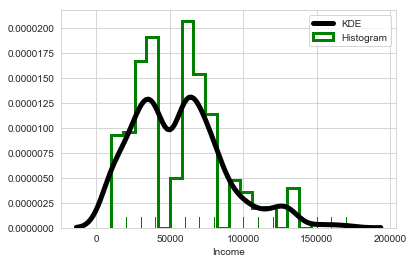

In [111]:
sns.distplot(df["Income"], rug=True, rug_kws={"color": "g"},
             kde_kws={"color": "k", "lw": 5, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3,
                       "alpha": 1, "color": "g","label" : "Histogram"})
plt.show()

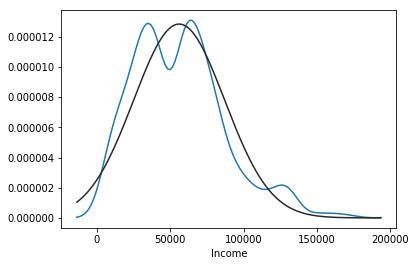

In [39]:
from scipy.stats import norm
sns.distplot(df["Income"], fit=norm, hist=False)

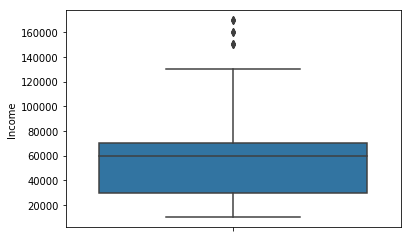

In [42]:
sns.boxplot(y = df['Income'])
plt.show()

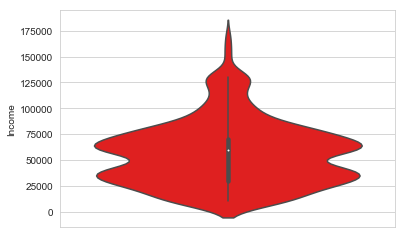

In [117]:
sns.violinplot(y = df["Income"],color = 'red')
plt.show()

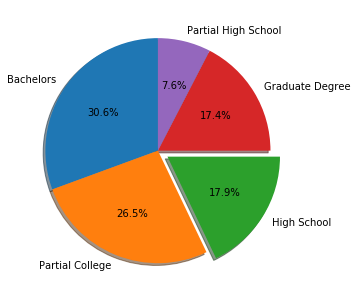

In [23]:
plt.figure(figsize = (5,5))
values = df["Education"].value_counts().keys()
counts = df['Education'].value_counts().tolist()
explode = (0,0, 0.1, 0,0)  

plt.pie(counts, explode=explode, labels=values, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.tight_layout()
plt.show()

### Bivariate

In [66]:
pd.crosstab(df['Gender'],df["Purchased Bike"])

Purchased Bike,No,Yes
Gender,,
Female,252,239
Male,267,242


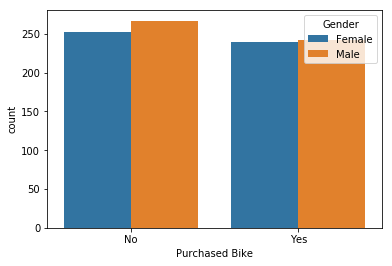

In [67]:
sns.countplot(df["Purchased Bike"],hue = df['Gender'])

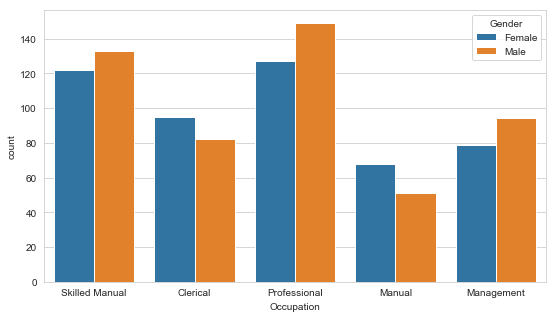

In [126]:
plt.figure(figsize=(9,5))
sns.countplot(x = df["Occupation"],hue = df['Gender'])

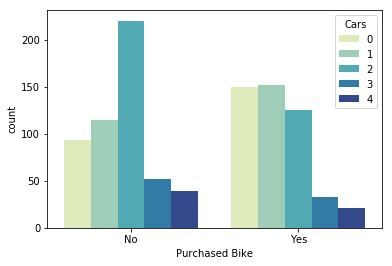

In [72]:
sns.countplot(df["Purchased Bike"],hue = df['Cars'],palette = "YlGnBu")

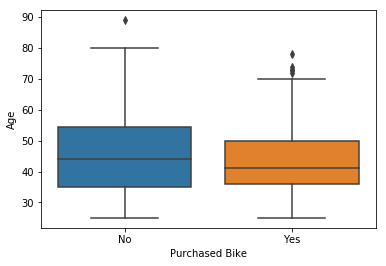

In [75]:
sns.boxplot(x = df["Purchased Bike"],y = df["Age"])

In [25]:
df["Cars"] = df["Cars"].astype('object')

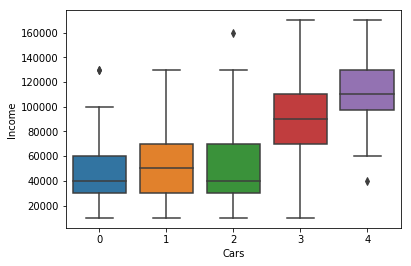

In [26]:
sns.boxplot(x = "Cars",y = "Income",data=df)